# Creating Sub-Grids from larger, familiar Ocean Grids

In [61]:
import xarray as xr

grid = xr.open_dataset("/Users/james/Documents/Github/esm_lab/gridGen/gridInfo/chassxu/regional.mom6.nc")
grid.x.values

array([[ -98.04000854,  -98.        ,  -97.95999146, ...,   36.11999512,
          36.16000366,   36.20001221],
       [ -98.04000854,  -98.        ,  -97.95999146, ...,   36.11999512,
          36.16000366,   36.20001221],
       [ -98.04000854,  -98.        ,  -97.95999146, ...,   36.11999512,
          36.16000366,   36.20001221],
       ...,
       [-102.53466797, -102.51742554, -102.50018311, ...,   55.77096558,
          55.79559326,   55.82022095],
       [-102.53964233, -102.52243042, -102.50521851, ...,   55.79647827,
          55.82107544,   55.84567261],
       [-102.5446167 , -102.5274353 , -102.51025391, ...,   55.82199097,
          55.84655762,   55.87112427]])

In [210]:
import cartopy 
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
def plotgrid(grid, plotStep, plotproj='nearside', crs=cartopy.crs.Geodetic(), transform=cartopy.crs.Geodetic(),mapExtent=[], lon0=-50, lat0=45):
    #initiate new plot, infer projection within the plotting procedure
    plt.figure(figsize=(8,8))
    if plotproj=='nearside':
        ax = plt.subplot(111, projection=cartopy.crs.NearsidePerspective(central_longitude=lon0, central_latitude=lat0))
    if plotproj=='platecarree':
        ax = plt.subplot(111, projection=cartopy.crs.PlateCarree())
    if mapExtent:
        ax.set_extent(mapExtent, crs=cartopy.crs.Geodetic())
    ax.stock_img()
    ax.coastlines()
    ax.gridlines()
    gl = ax.gridlines(crs=cartopy.crs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
    gl.xlabels_top = False
    gl.ylabels_left = True
    gl.xlines = True
    gl.xlocator = mticker.FixedLocator([-105, -100, -95, -45, -40, -35, -30, 0])
    gl.ylocator = mticker.FixedLocator([-10,-5,0,55,60,65])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    #gl.xlabel_style = {'size': 15, 'color': 'gray'}
    #gl.xlabel_style = {'color': 'red', 'weight': 'bold'}

    nj = grid.dims['nyp']
    ni = grid.dims['nxp']

    iColor = 'k'
    jColor = 'k'
    iLinewidth = 1.0
    jLinewidth = 1.0
    plotAllVertices= True
    for i in range(0, ni+1, plotStep):
        if (i == 0 or i == (ni-1)) or plotAllVertices:
            if i <= ni-1:
                ax.plot(grid['x'][:,i], grid['y'][:,i], iColor, linewidth=iLinewidth, transform=transform)
    for j in range(0, nj+1, plotStep):
        if (j == 0 or j == (nj-1)) or plotAllVertices:
            if j <= nj-1:
                ax.plot(grid['x'][j,:], grid['y'][j,:], jColor, linewidth=jLinewidth, transform=transform)
    
    return ax

# ideally I would use find nearest to find the indice closest to a particular value, but because this is a mesh 2d grid it doesn't work as intended
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx



/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:>

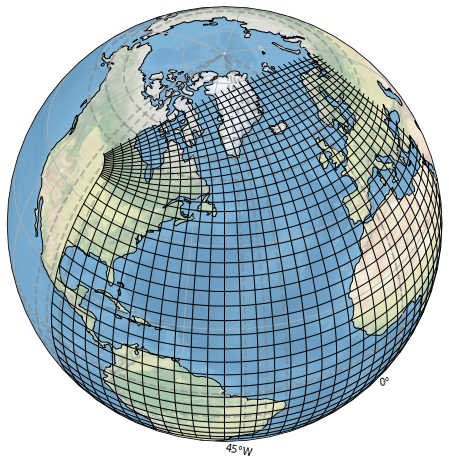

In [211]:
plotgrid(grid=grid, plotStep=100)

# Use Index Selection to create subgrid

In [167]:
## ideally I would use find nearest to find the indice closest to a particular value, but because this is a mesh 2d grid it doesn't work as intended
#latMinInd = find_nearest(array = grid['y'].values, value = 45)
#latMaxInd = find_nearest(array = grid['y'].values, value = 50)
#lonMinInd = find_nearest(array = grid['x'].values, value = -80)
#lonMaxInd = find_nearest(array = grid['x'].values, value = -70)

In [235]:
latMinInd = 600
latMaxInd = 2550
lonMinInd = 0
lonMaxInd = 1550

In [236]:
subgrid = grid.isel(nyp=slice(latMinInd, latMaxInd), nxp=slice(lonMinInd,lonMaxInd), ny=slice(latMinInd, latMaxInd-1), nx=slice(lonMinInd,lonMaxInd-1))
subgrid

<xarray.Dataset>
Dimensions:   (nx: 1549, nxp: 1550, ny: 1949, nyp: 1950)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 -98.04 -98.0 -97.96 ... -37.27 -37.23 -37.19
    y         (nyp, nxp) float64 -5.153 -5.153 -5.153 ... 58.16 58.16 58.16
    angle_dx  (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    area      (ny, nx) float64 ...
    tile      |S255 b'tile1'
Attributes:
    history:  grid_hycom2mom6

/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:>

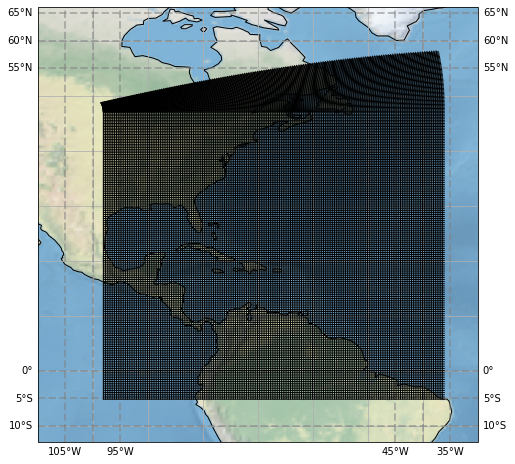

In [237]:
plotgrid(grid=subgrid, plotStep=10, plotproj='platecarree',mapExtent=[-110, -30, -10,60])

/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:>

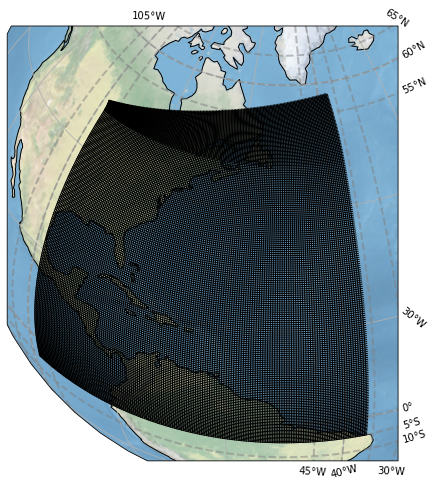

In [238]:
plotgrid(grid=subgrid, plotStep=10,mapExtent=[-110, -30, -10,60])

In [239]:
subgrid.to_netcdf("/Users/james/Downloads/subset.nc")

In [240]:
test = xr.open_dataset("/Users/james/Downloads/subset.nc")

In [241]:
test

<xarray.Dataset>
Dimensions:   (nx: 1549, nxp: 1550, ny: 1949, nyp: 1950)
Dimensions without coordinates: nx, nxp, ny, nyp
Data variables:
    x         (nyp, nxp) float64 ...
    y         (nyp, nxp) float64 ...
    angle_dx  (nyp, nxp) float64 ...
    dx        (nyp, nx) float64 ...
    dy        (ny, nxp) float64 ...
    area      (ny, nx) float64 ...
    tile      |S255 ...
Attributes:
    history:  grid_hycom2mom6

/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/Users/james/opt/anaconda3/envs/gridTools/lib/python3.9/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


<GeoAxesSubplot:>

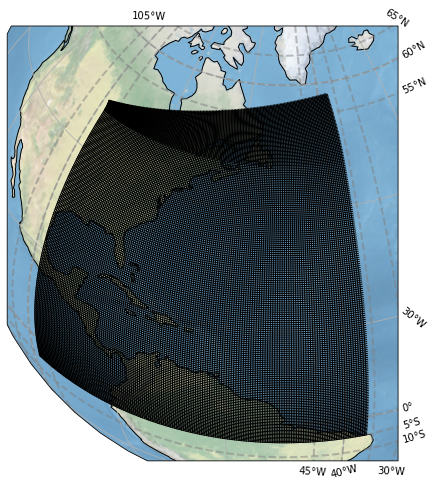

In [243]:
plotgrid(grid=test, plotStep=10, mapExtent=[-110, -30, -10,60])